### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm

### Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
  - a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
       respektive dataframe så du får något liknande som nedan.
  - b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.
  - c) Rita ett stapeldiagram på totala poängen för de olika ämnena.
  - d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
  - e) Rita ett stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.
Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [739]:
# A)
import pandas as pd

# Read the file and all different sheets
df_riks_2023 = pd.read_excel("../Labb2/data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)

sheets_to_change = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk", "Rapportbeskrivning och def."]

# Function to change the columnnames in all sheets
def change_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# Loopas through each sheet and changes the columnnames if the sheet is in sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_riks_2023["Engelska"]


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [740]:
# Testing if more than the first sheet can be printed
df_math = df_riks_2023["Matematik"]

df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [741]:
# Extracts number of girls with grades A-F
girls_A_F = df_riks_2023["Matematik"].loc[0, "Flickor (A-F)"]
#Extracts the percentage of girls with grades A-E and converts it to a decimal
girls_A_E = df_riks_2023["Matematik"].loc[0, "Flickor (A-E)"] / 100  
# Calculates the number of girls with F-grade by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
girls_F = girls_A_F * (1 - girls_A_E)
rounded_girls_F =round(girls_F)

print("Antal flickor som fått betyget F:", rounded_girls_F)


boys_A_F = df_riks_2023["Matematik"].loc[0, "Pojkar (A-F)"]
boys_A_E = df_riks_2023["Matematik"].loc[0, "Pojkar (A-E)"] / 100
boys_F = boys_A_F * (1 - boys_A_E)
rounded_boys_F =round(boys_F)

print("Antal pojkar som fått betyget F:", rounded_boys_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


In [742]:
# B)

# Total number of girls with F in math
girls_F = (pd.to_numeric(df_riks_2023["Matematik"]["Flickor (A-F)"]) * 0.113)
print("Totalt antal flickor som fått F:", round(girls_F[0]))

# Total number of boys with F in math
boys_F = (pd.to_numeric(df_riks_2023["Matematik"]["Pojkar (A-F)"]) * 0.105)
print("Totalt antal killar som fått F:", round(boys_F[0]))


Totalt antal flickor som fått F: 5825
Totalt antal killar som fått F: 5798


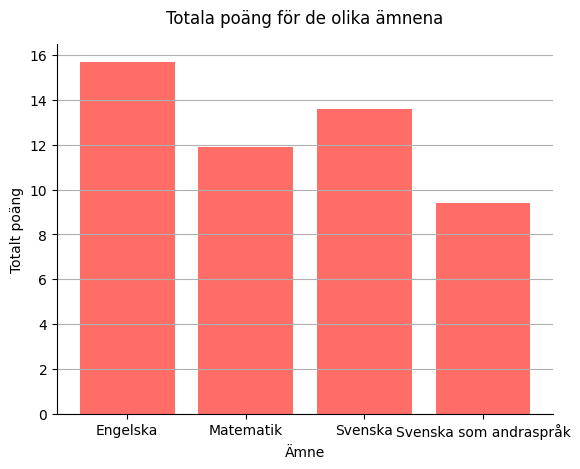

In [743]:
# C)

import matplotlib.pyplot as plt

# Loops through each sheet and changes the columnnames as above
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Creates a DataFrame with the total points for each subject
df_total_points = pd.DataFrame([
    {"Ämne": sheet_name, "Totalt poäng": pd.to_numeric(df.loc[0]["Totalt (poäng)"], errors="coerce")}
    for sheet_name, df in df_riks_2023.items() if sheet_name in sheets_to_change and "Totalt (poäng)" in df.columns])

# Skips/cleans possible NaN-values
df_total_points.dropna(inplace=True)

# draws the graf
fig, ax = plt.subplots()

ax.bar(df_total_points["Ämne"], df_total_points["Totalt poäng"], color="#FF6D66")
ax.set_title("Totala poäng för de olika ämnena", pad=15)
ax.set_xlabel("Ämne")
ax.set_ylabel("Totalt poäng")

# Creates a grid in the graf that makes it easier
ax.grid(axis="y")

# Removes the top and right axel-line
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Changes the labels on the x axel so they fit
plt.xticks(ha="center", rotation_mode="anchor", fontsize=10)

plt.show()


C:\Users\Sandra\AppData\Local\Temp\ipykernel_6256\562189424.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])


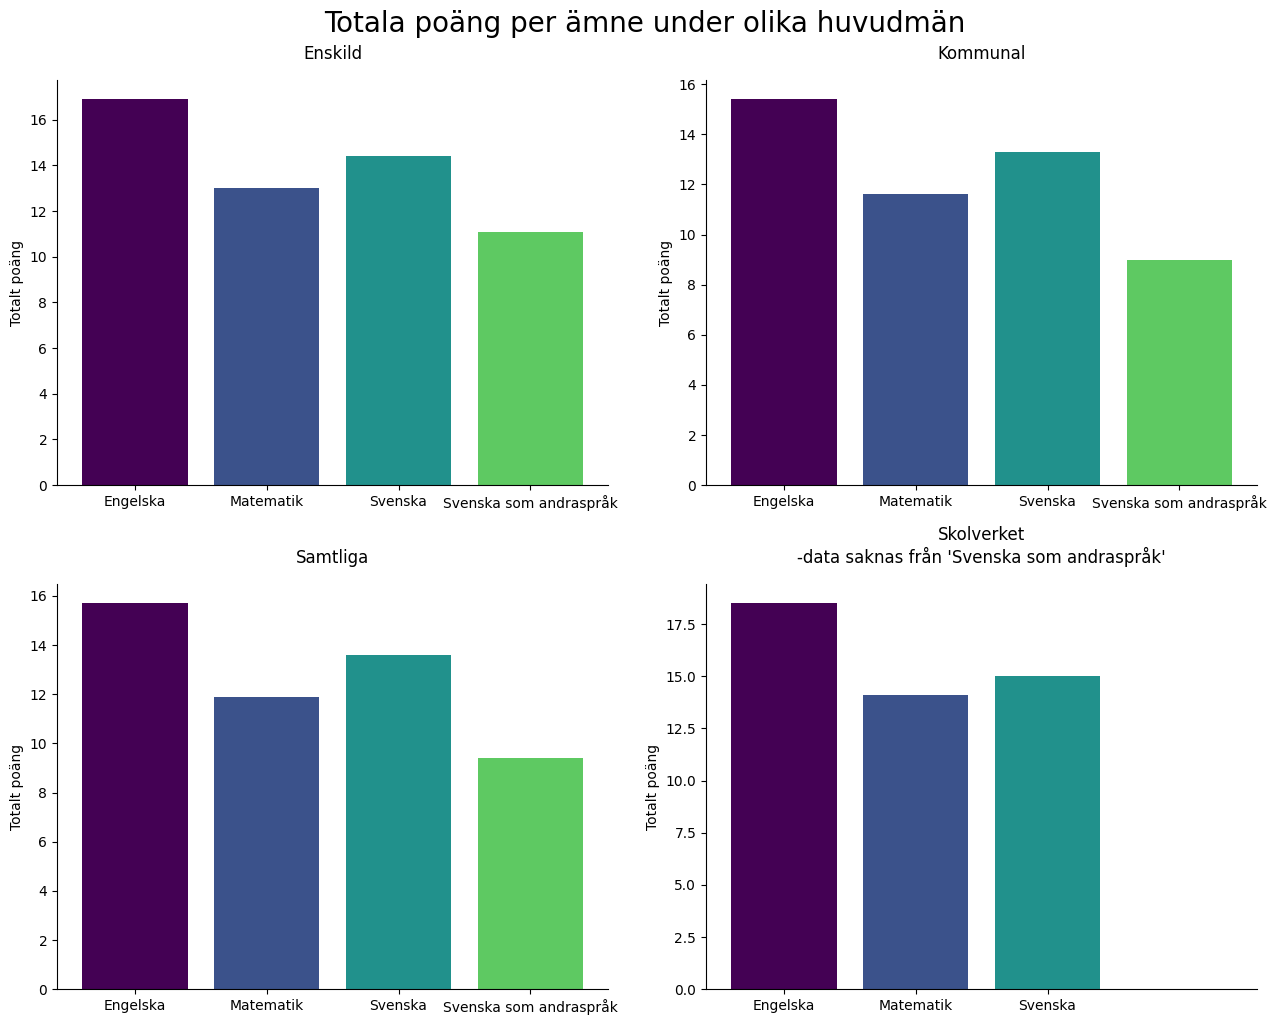

In [744]:
# D)

import matplotlib.pyplot as plt

for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_total_points = pd.DataFrame(columns=['Huvudman', 'Ämne', 'Totalt poäng'])

# Loops through each sheet and collects the total points for each subject and "huvudman"
for sheet_name in sheets_to_change:
    for huvudman in df_riks_2023[sheet_name]['Huvudman'].unique():
        if 'Totalt (poäng)' in df_riks_2023[sheet_name].columns:
            total_points = pd.to_numeric(df_riks_2023[sheet_name][df_riks_2023[sheet_name]['Huvudman'] == huvudman]['Totalt (poäng)'], errors='coerce').sum(axis=0)
            df_total_points = pd.concat([df_total_points, pd.DataFrame({'Huvudman': [huvudman], 'Ämne': [sheet_name], 'Totalt poäng': [total_points]})])

df_total_points.dropna(inplace=True)

# Creates subplots and changes the size of the graf
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

# Loops through each "huvudman" and draws a bargraf in respective subplot-graf
for i, (huvudman, group) in enumerate(df_total_points.groupby('Huvudman')):
    # Iindexing the matris axs to get the specifik axel (subplot) on position (row, column) in the grid.
    ax = axs[i // 2, i % 2] 
    cmap = plt.get_cmap('viridis')
    colors = [cmap(i/len(group['Ämne'])) for i in range(len(group['Ämne']))]        

    bar_width = 0.8

    ax.bar(group['Ämne'], group['Totalt poäng'], color=colors, width=bar_width)
    ax.set_title(f"{huvudman}", pad=15)
    ax.set_ylabel('Totalt poäng')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Adjust x-label
    ax.set_xticks(range(len(group['Ämne'])))
    ax.set_xticklabels(group['Ämne'], ha="center", rotation_mode="anchor", fontsize=10)

    if huvudman == "Skolverket" or sheet_name == "Svenska som andraspråk":
            ax.set_title(f"{huvudman}\n-data saknas från 'Svenska som andraspråk'", pad=15)
            # Removes x-axel-ticks and labels for the last bar
            ax.set_xticks([0,1,2])
    

# Adjust the layout to avoid overlapp in the graf
plt.tight_layout()
plt.suptitle("Totala poäng per ämne under olika huvudmän", size=20, y=1.02)
plt.show()


### Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.
  - b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.
  - c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

In [745]:
#A )

import pandas as pd

# Reads data from both tabels in betyg och prov document
df_grades_1A = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1A")
df_grades_1B = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

# reads row 9-14 and 7-12 in respective tabel. 
data_1A = df_grades_1A.iloc[9:14]
data_1B = df_grades_1B.iloc[7:12]

# Renames the columns
a_columns = [
    "Läsår",
    "Totalt som avslutat åk 9",
    "Totalt som avslutat åk 9: Flickor",
    "Totalt som avslutat åk 9: Pojkar",
    "Elever med slutbetyg: Totalt",
    "Elever med slutbetyg: Flickor",
    "Elever med slutbetyg: Pojkar",
    "Godkända slutbetyg: Totalt",
    "Godkända slutbetyg: Flickor",
    "Godkända slutbetyg: Pojkar"
]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]

data_1A.columns = a_columns
data_1B.columns = b_columns

display(data_1A)
display(data_1B)

,Läsår,Totalt som avslutat åk 9,Totalt som avslutat åk 9: Flickor,Totalt som avslutat åk 9: Pojkar,Elever med slutbetyg: Totalt,Elever med slutbetyg: Flickor,Elever med slutbetyg: Pojkar,Godkända slutbetyg: Totalt,Godkända slutbetyg: Flickor,Godkända slutbetyg: Pojkar
9,2018/19,112731,54667,58064,112280,54430,57850,110663,53757,56906
10,2019/20,115023,55670,59353,114444,55389,59055,112728,54711,58017
11,2020/21,116359,56715,59644,115710,56394,59316,114136,55721,58415
12,2021/22,120525,58513,62012,119891,58207,61684,117935,57312,60623
13,2022/23,121369,59043,62326,120742,58703,62039,118736,57781,60955


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


In [819]:
# A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
#flickor och pojkar i samma graf.

# Total number of students that got an F in respective "department"
total_F = (data_1B["% Som saknar godkänt: Totalt"])
print("Totalt antal som saknar godkänt:\n", round(total_F))

girls_F_grade = (data_1B["% Som saknar godkänt: Flickor"])
print("Totalt antal flickor som saknar godkänt:\n", round(girls_F_grade))

boys_F_grade = (data_1B["% Som saknar godkänt: Pojkar"])
print("Totalt antal pojkar som saknar godkänt:\n", round(boys_F_grade))



Totalt antal som saknar godkänt:
 7     24.5
8     23.9
9     23.9
10    25.9
11    26.8
Name: % Som saknar godkänt: Totalt, dtype: object
Totalt antal flickor som saknar godkänt:
 7     21.7
8     21.4
9     21.9
10    24.2
11    25.5
Name: % Som saknar godkänt: Flickor, dtype: object
Totalt antal pojkar som saknar godkänt:
 7     27.2
8     26.3
9     25.9
10    27.5
11      28
Name: % Som saknar godkänt: Pojkar, dtype: object


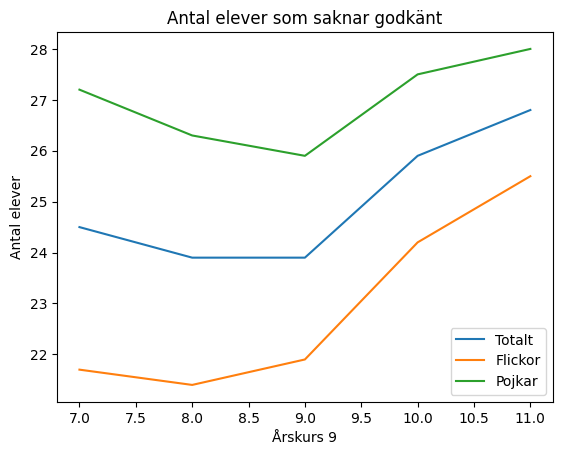

In [820]:
# A)

# Counts number of students without G or a grade at all
total_F = (data_1B["% Som saknar godkänt: Totalt"])
girls_F_grade = (data_1B["% Som saknar godkänt: Flickor"])
boys_F_grade = (data_1B["% Som saknar godkänt: Pojkar"])


# Draws the linediagram
plt.plot(total_F, label='Totalt')
plt.plot(girls_F_grade, label='Flickor')
plt.plot(boys_F_grade, label='Pojkar')

# adjusts the labels
plt.title('Antal elever som saknar godkänt')
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')
plt.legend()

plt.show()


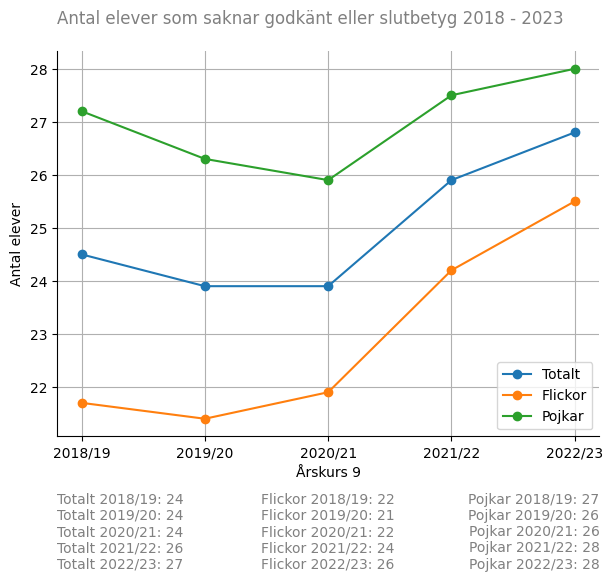

In [821]:
# A) PLOTLY

years = data_1A['Läsår']

# Counts number of students without G or a grade at all. as above
total_F = (data_1B["% Som saknar godkänt: Totalt"])
girls_F_grade = (data_1B["% Som saknar godkänt: Flickor"])
boys_F_grade = (data_1B["% Som saknar godkänt: Pojkar"])

# Creates subplots and size
fig, ax = plt.subplots(figsize=(7, 5))

# Draws lines and plots dots based on years
plt.plot(years, total_F, label='Totalt', marker='o')
plt.plot(years, girls_F_grade, label='Flickor', marker='o')
plt.plot(years, boys_F_grade, label='Pojkar', marker='o')

# Adjusts labels and gives space between top label and the graf and places it to the left
plt.title('Antal elever som saknar godkänt eller slutbetyg 2018 - 2023', pad=20, color="gray", loc="left")
plt.xlabel('Årskurs 9')
plt.ylabel('Antal elever')

# Gives the graf a grid
plt.grid(True)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adds three lists at the bottom with year, who and sum for more clarity
plt.text(0.0, -0.35, '\n'.join([f'Totalt {year}: {round(val)}' for val, year in zip(total_F, years)]), transform=plt.gca().transAxes, ha='left', va='bottom', color='gray')
plt.text(0.5, -0.35, '\n'.join([f'Flickor {year}: {round(val)}' for val, year in zip(girls_F_grade, years)]), transform=plt.gca().transAxes, ha='center', va='bottom', color='gray')
plt.text(1.0, -0.35, '\n'.join([f'Pojkar {year}: {round(val)}' for val, year in zip(boys_F_grade, years)]), transform=plt.gca().transAxes, ha='right', va='bottom', color='gray')

plt.show()


In [823]:
# A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
#    flickor och pojkar i samma graf.

years = data_1B['Läsår']
import plotly.express as px

# Creates a new DataFrame for Plotly
df_plotly = pd.DataFrame({
    'Year': years,
    'Total': total_F.tolist(),
    'Girls': girls_F_grade.tolist(),
    'Boys': boys_F_grade.tolist()
})

# Plotly Express line plot
fig = px.line(df_plotly, x='Year', y=['Total', 'Girls', 'Boys'], markers=True, title='Antal elever som saknar godkänt eller slutbetyg 2018 - 2023')

# Justera axelbeskrivningarna
fig.update_layout(xaxis_title='Årskurs 9', yaxis_title='Antal elever')

# Lägg till legend
fig.update_layout(showlegend=True)

# Lägg till grid
fig.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))

# Ta bort topp- och högerspån
fig.update_layout(xaxis=dict(showline=True, showgrid=False),
                  yaxis=dict(showline=True, showgrid=False))


fig.update_layout(height=500, width=1000)

# Visa plotten
fig.show()


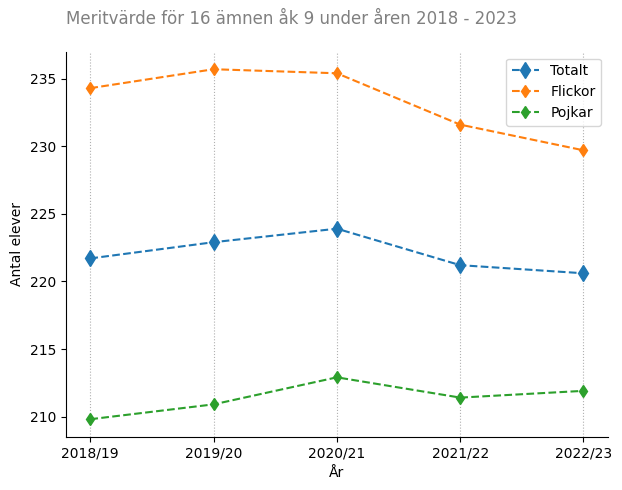

In [809]:
# B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23. Gör till PLOTLY

years = data_1B["Läsår"]

# Sets mean value of total, girls and boys to variables.
mean_T = (data_1B["Medelvärde 16 ämnen: Totalt"])
mean_G = (data_1B["Medelvärde 16 ämnen: Flickor"])
Mean_B = (data_1B["Medelvärde 16 ämnen: Pojkar"])

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(years, mean_T, label="Totalt", marker="d", ms=8, ls="--")
ax.plot(years, mean_G, label="Flickor", marker="d", ls="--")
ax.plot(years, Mean_B, label="Pojkar", marker="d", ls="--")

# Renames labels and gives space at top. Places toplabel to the left
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", pad=20, color="gray", loc="left")
plt.xlabel("År")
plt.ylabel("Antal elever")

# Gives the graf a grid on x-axis with dotted lines
plt.grid(axis= "x", ls = ':', linewidth = 0.8)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fig.savefig("name.png")

plt.show()


In [816]:
# B) MED PLOTLY

# # Creates a new DataFrame
df_plotly_2 = pd.DataFrame({
    'Year': years,
    'Total': mean_T.tolist(),
    'Girls': mean_G.tolist(),
    'Boys': Mean_B.tolist()
})

fig_2 = px.line(df_plotly_2, x='Year', y=['Total', 'Girls', 'Boys'], markers=True, title='Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023')

# Adjusts axel descriptions
fig_2.update_layout(xaxis_title='År', yaxis_title='Antal elever')

# Adds legend with description of whats what
fig_2.update_layout(showlegend=True)

# Adds grid
fig_2.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray', zeroline=False, showline=False),
                   yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray', zeroline=False, showline=False))

# Removes top and right line
fig_2.update_layout(xaxis=dict(showline=False, showgrid=False),
                    yaxis=dict(showline=False, showgrid=False))

# Updates to change fig size
fig_2.update_layout(height=600, width=1000)

fig_2.show()


In [750]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
# läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

# Reads from df_grades_1B and locates row 29 to 32 and makes it a variable
data_parents = df_grades_1B.iloc[29:32]

# Renames the columns
b2_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]
data_parents.columns = b2_columns

# Displays DataFrame data_parents
display(data_parents)


,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
29,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
30,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
31,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


In [751]:
# C)

# Counts mean value for each gender and total
Parents_T = data_parents["Medelvärde 16 ämnen: Totalt"]
Parents_F = data_parents["Medelvärde 16 ämnen: Flickor"]
Parents_P = data_parents["Medelvärde 16 ämnen: Pojkar"]

# Prints to check result
print(Parents_T)
print(Parents_F)
print(Parents_P)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: object
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: object
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: object


In [752]:
# C)
# Converts columns to numeric values
Parents_T_numeric = pd.to_numeric(Parents_T)
Parents_F_numeric = pd.to_numeric(Parents_F)
Parents_P_numeric = pd.to_numeric(Parents_P)

# Prints to check result
print(Parents_T_numeric)
print(Parents_F_numeric)
print(Parents_P_numeric)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: float64
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: float64
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: float64


In [753]:
# C)
import numpy as np

# Width on each bar
bar_width = 0.2

# Creates lists for x-values
x_values_totalt = np.arange(len(Parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

# Prints to check result
print(x_values_totalt)
print(x_values_flickor)
print(x_values_pojkar)

[0 1 2]
[0.2 1.2 2.2]
[0.4 1.4 2.4]


<BarContainer object of 3 artists>

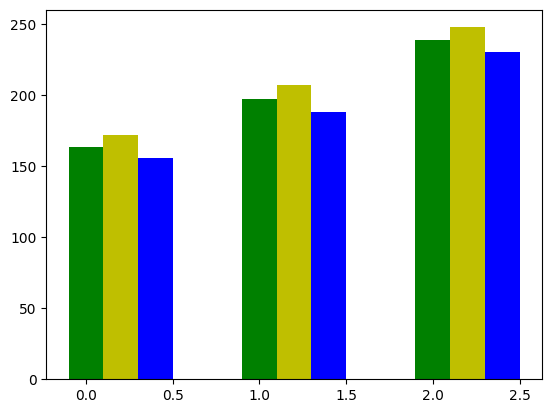

In [754]:
# C)
# Draws bardiagrams for each gender and educationlevel with the converted num values. Gives it a label, color and the bar width from above
plt.bar(x_values_totalt, Parents_T_numeric, label="Meritvärde: Totalt", color="g", width=bar_width)
plt.bar(x_values_flickor, Parents_F_numeric, label="Meritvärde: Flickor", color="y", width=bar_width)
plt.bar(x_values_pojkar, Parents_P_numeric, label="Meritvärde: Pojkar", color="b", width=bar_width)

In [755]:
# C)
# Prints to check result
print(data_parents.index)

RangeIndex(start=29, stop=32, step=1)


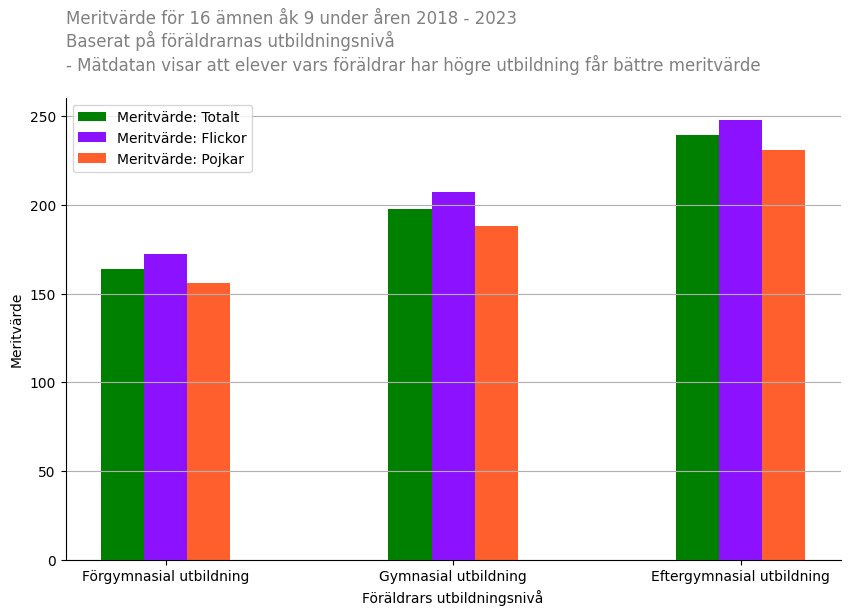

In [756]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
# läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

fig, ax = plt.subplots(figsize=(10, 6))

# Width of bars
bar_width = 0.15

x_values_totalt = np.arange(len(Parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

plt.bar(x_values_totalt, Parents_T_numeric, label="Meritvärde: Totalt", color="g", width=bar_width)
plt.bar(x_values_flickor, Parents_F_numeric, label="Meritvärde: Flickor", color="#8C12FF", width=bar_width)
plt.bar(x_values_pojkar, Parents_P_numeric, label="Meritvärde: Pojkar", color="#FF5F2C", width=bar_width)



# Adjusts labels and gives space between top label and the graf and places it to the left
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023\nBaserat på föräldrarnas utbildningsnivå\n- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde", pad=20, color="gray", loc="left")
plt.xlabel("Föräldrars utbildningsnivå")
plt.ylabel("Meritvärde")

# Use year/educationlevel as x-axel tick positions
group_labels = ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"]
plt.xticks(x_values_totalt + bar_width, group_labels)

plt.grid(axis="y")
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [844]:
import plotly.express as px

df_plotly_3 = pd.DataFrame({
    'Education Level': ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"],
    'Meritvärde: Totalt': Parents_T_numeric.tolist(),
    'Meritvärde: Flickor': Parents_F_numeric.tolist(),
    'Meritvärde: Pojkar': Parents_P_numeric.tolist()
})

# Melts DataFrame so that the bars are next to each other
df_plotly_melted = pd.melt(df_plotly_3, id_vars=['Education Level'], var_name='Category', value_name='Meritvärde')

# Plotly Express bar, gives names to labels and changes colors of the bars 
fig_3 = px.bar(df_plotly_melted, x='Education Level', y='Meritvärde', color='Category',
               color_discrete_sequence=['green', '#8C12FF', '#FF5F2C'],
               title=("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023\nBaserat på föräldrarnas utbildningsnivå\n- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde"))

fig_3.update_layout(xaxis_title='Föräldrarnas utbildningsnivå', yaxis_title='Meritvärde')

fig_3.update_layout(showlegend=True)
# Fixes the titel position and splits it into lines
fig_3.update_layout(
    title={
        'text': "Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023, baserat på föräldrarnas utbildningsnivå<br>"
                "- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde",
        # Adjusts text and changes the vertical position of the title
        'y': 0.95,
        # Adjusts text and changes the horisontal position of the title
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig_3.update_layout(yaxis=dict(showgrid=True, gridwidth=1, gridcolor='LightGray'))

fig_3.update_layout(xaxis=dict(showline=True, showgrid=False),
                    yaxis=dict(showline=True, showgrid=False))

# Groups bars
fig_3.update_layout(barmode='group')

fig_3.show()


### Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

    - Andel elever med minst ett saknat betyg:
        - (Antal elever med minst ett saknat betyg / Totalt antal elever) * 100
        - Ger andelen elever som inte uppnår ett godkänt betyg i minst ett ämne.

    - Genomsnittligt meritvärde för elever med föräldrar som jobbar inom skola:
        - Genomsnittligt meritvärde för elever vars föräldrar arbetar inom skolverket.
        - Kan indikera om det finns något sammanhang mellan föräldrarnas yrke och elevernas prestationer.

    - Andel flickor med minst ett saknat betyg:
        - (Antal flickor med minst ett saknat betyg / Totalt antal flickor) * 100
        - Ger insikt i andelen flickor som har svårigheter att uppnå godkänt betyg i minst ett ämne.

    - Andel elever som går vidare till högre utbildning:
        - (Antal elever som går vidare till högre utbildning / Totalt antal elever som tog examen) * 100
        - Mäter skolans framgång i att förbereda elever för fortsatta studier.

    - Andel elever som uppnår nationella standarder i alla ämnen:
        - Beräkning: (Antal elever som uppnår nationella standarder i alla ämnen / Totalt antal elever) * 100
        - Syfte: Ger en indikation på skolans framgång i att uppfylla nationella akademiska standarder.

    - Andel elever med förbättrat meritvärde från föregående år:
        - Beräkning: (Antal elever med ökat meritvärde från föregående år / Totalt antal elever) * 100
        - Syfte: Mäter elevernas akademiska framsteg över tiden.

### Gymnasieskola - Riksnivå - Relationen mellan prov och betyg - VT22 och VT23 för att jämföra

or 

### Gymnasieskola - Riksnivå - Betyg - Jämförelse av betygsresultat över tid 2022/2023

In [757]:
gymnasie_vt23 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT23_Riket.xlsx", sheet_name=None, skiprows=8)
gymnasie_vt22 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT22_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change2 = ["Engelska 5", "Engelska 6", "Matematik 1A", "Matematik 1B", "Matematik 2B", "Matematik 3B", "Matematik 3C", "Matematik 4", "Svenska 1", "Svenska 3", "Svenska som andraspråk 1", "Svenska som andraspråk 3", "Rapportbeskrivning och def."]

# Function to change columnnames in all sheets
def change_columns(df2):
    df2.columns = ["Riket", "Huvudman", "Antal elever som har både provbetyg och kursbetyg", "Andel lägre", "Andel lika", "Andel högre", "Antal kvinnor", "Andel lägre kvinnor", "Andel lika kvinnor", "Andel högre kvinnor", "Antal män", "Andel lägre män", "Andel lika män", "Andel högre män"][:len(df2.columns)]
    return df2

# Loops through each sheet and changescolumnnames if it's in sheets_to_change
for sheet_name, df2 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt23[sheet_name] = change_columns(df2)

for sheet_name, df2 in gymnasie_vt22.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt22[sheet_name] = change_columns(df2)

print("Antal elever: Antal elever som har både provbetyg och kursbetyg\nAndel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget\nAndel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg"
      "\nAndel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget\nAntal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg\nAntal män: Antal manliga elever som har både provbetyg och kursbetyg")

display(gymnasie_vt23["Engelska 5"])
display(gymnasie_vt22["Engelska 5"])

Antal elever: Antal elever som har både provbetyg och kursbetyg
Andel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget
Andel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg
Andel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget
Antal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg
Antal män: Antal manliga elever som har både provbetyg och kursbetyg


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,23197,10.6,73.8,15.6,9100,7.4,73.9,18.7,14097,12.6,73.7,13.6
1,Riket,Kommunal,15451,11.2,74.3,14.5,5768,8.0,74.5,17.5,9683,13.1,74.2,12.7
2,Riket,Enskild,7336,9.4,72.3,18.3,3094,6.3,72.3,21.3,4242,11.6,72.3,16.1
3,Riket,Region,410,9.5,79.8,10.7,238,7.1,78.6,14.3,172,12.8,81.4,5.8


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,22813,11.5,69.7,18.8,8941,8.1,69.1,22.7,13872,13.7,70.0,16.3
1,Riket,Kommunal,14920,11.4,71.9,16.7,5485,7.8,71.3,20.8,9435,13.4,72.3,14.3
2,Riket,Enskild,7501,12.1,65.0,22.9,3217,8.9,65.3,25.7,4284,14.5,64.7,20.8
3,Riket,Region,392,5.9,72.4,21.7,239,4.6,69.9,25.5,153,7.8,76.5,15.7


In [758]:
# Display to check result
gymnasie_vt22["Engelska 5"].head()

,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,22813,11.5,69.7,18.8,8941,8.1,69.1,22.7,13872,13.7,70.0,16.3
1,Riket,Kommunal,14920,11.4,71.9,16.7,5485,7.8,71.3,20.8,9435,13.4,72.3,14.3
2,Riket,Enskild,7501,12.1,65.0,22.9,3217,8.9,65.3,25.7,4284,14.5,64.7,20.8
3,Riket,Region,392,5.9,72.4,21.7,239,4.6,69.9,25.5,153,7.8,76.5,15.7


In [759]:
# Checks columnnames in dataset
print(gymnasie_vt22["Engelska 5"].columns)

Index(['Riket', 'Huvudman',
       'Antal elever som har både provbetyg och kursbetyg', 'Andel lägre',
       'Andel lika', 'Andel högre', 'Antal kvinnor', 'Andel lägre kvinnor',
       'Andel lika kvinnor', 'Andel högre kvinnor', 'Antal män',
       'Andel lägre män', 'Andel lika män', 'Andel högre män'],
      dtype='object')


In [760]:
# Variabel for classyear
grades_A = gymnasie_vt22["Engelska 5"]
grades_B = gymnasie_vt23["Engelska 5"]

# Creates numpy-array for x-values
grades_A_np = np.arange(len(grades_A))
grades_B_np = np.arange(len(grades_B))

# Counts number students without G or a grade at all
grade_low_A = (grades_A["Andel lägre"])
grade_same_A = (grades_A["Andel lika"])
grade_high_A = (grades_A["Andel högre"])
grade_low_B = (grades_B["Andel lägre"])
grade_same_B = (grades_B["Andel lika"])
grade_high_B = (grades_B["Andel högre"])

display(grade_low_A)

0    11.5
1    11.4
2    12.1
3     5.9
Name: Andel lägre, dtype: float64

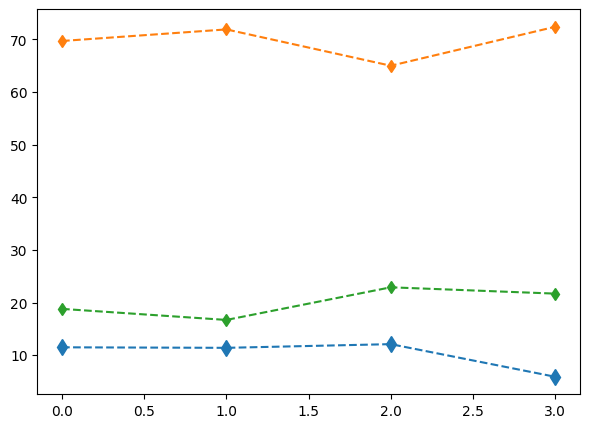

In [761]:
fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(grades_A_np, grade_low_A, label="Lägre", marker="d", ms=8, ls="--")
plt.plot(grades_A_np, grade_same_A, label="Samma", marker="d", ls="--")
plt.plot(grades_A_np, grade_high_A, label="Högre", marker="d", ls="--")

### Undersöker om elever i åk nio får högre, samma eller lägre betyg i snitt från år 2022 till 2023

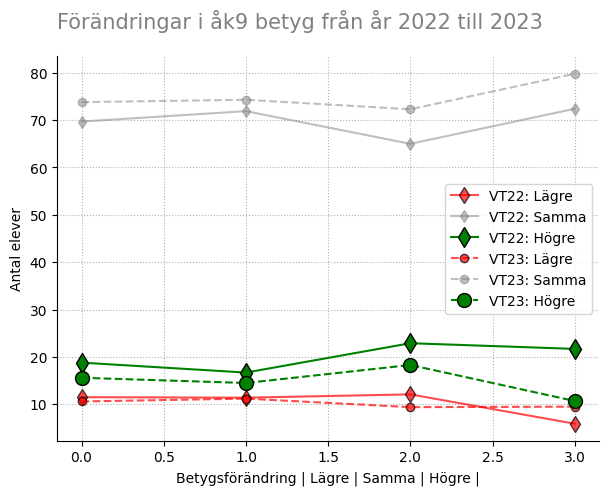

In [762]:
# 2.

grades_A = gymnasie_vt22["Engelska 5"]
grades_B = gymnasie_vt23["Engelska 5"]

# Creates variable where numpy aranges by length
grades_A_np = np.arange(len(grades_A))
grades_B_np = np.arange(len(grades_B))

# Checks the grade from tabel A to check value of lower, same and higher grader from VT22
grade_low_A = (grades_A["Andel lägre"])
grade_same_A = (grades_A["Andel lika"])
grade_high_A = (grades_A["Andel högre"])

# Checks the grade from tabel B to check value of lower, same and higher grader from VT23
grade_low_B = (grades_B["Andel lägre"])
grade_same_B = (grades_B["Andel lika"])
grade_high_B = (grades_B["Andel högre"])

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(grades_A_np, grade_low_A, label="VT22: Lägre", marker="d", ms=8, color="r", mec = "black", alpha=0.7)
ax.plot(grades_A_np, grade_same_A, label="VT22: Samma", marker="d", color="gray", alpha=0.5)
ax.plot(grades_A_np, grade_high_A, label="VT22: Högre", marker="d", ms=10, color="g", mec = "black")

ax.plot(grades_B_np, grade_low_B, label="VT23: Lägre", marker="o", ls="--", color="r", mec = "black", alpha=0.7)
ax.plot(grades_B_np, grade_same_B, label="VT23: Samma", marker="o", ls="--", color="gray", alpha=0.5)
ax.plot(grades_B_np, grade_high_B, label="VT23: Högre", marker="o", ms=10, ls="--", color="g", mec = "black")

plt.title("Förändringar i åk9 betyg från år 2022 till 2023", pad=20, size=15, color="gray", loc="left")
plt.xlabel("Betygsförändring | Lägre | Samma | Högre |")
plt.ylabel("Antal elever")

plt.grid(ls = ':', linewidth = 0.8)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### SKriv en diskussion som beskriver resultatet och hur jag kom fram till det

In [763]:
'''
gymnasie_betyg_22_23 = pd.read_excel("../Labb2/data/Gymnasieskola_Jämförelse_betygsresultat_över_tid_2023_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change2 = ["Nationella program", "Högskoleförberedande program", "Yrkesprogram", "Barn- och fritidsprogrammet", "Bygg- och anläggningsprogrammet", "Ekonomiprogrammet", "El- och energiprogrammet", "Estetiska programmet", "Fordons- och transportprogrammet", "Handels- och administrationsprogrammet", "Hantverksprogrammet", "Hotell- och turismprogrammet", "Humanistiska programmet", "Industritekniska programmet", "Naturbruksprogrammet", "Naturvetenskapsprogrammet", "Restaurang- och livsmedelsprogrammet", "Riksrekryterande utbildningar", "Samhällsvetenskapsprogrammet", "Teknikprogrammet", "VVS- och fastighetsprogrammet", "Vård- och omsorgsprogrammet", "Rapportbeskrivning och def."]

# Funktion för att ändra kolumnnamnen i alla sheets
def change_columns(df3):
    df3.columns = ["Riket", "Huvudman", "Betygsresultat", "22/23 ", "21/22", "20/21", "19/20", "18/19", "17/18", "16/17", "15/16", "14/15", "13/14"][:len(df3.columns)]
    return df3

# Loopar genom varje sheet och ändrar kolumnnamnen om sheetet finns med i sheets_to_change
for sheet_name, df2 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt23[sheet_name] = change_columns(df2)

display(gymnasie_betyg_22_23)'''

'\ngymnasie_betyg_22_23 = pd.read_excel("../Labb2/data/Gymnasieskola_Jämförelse_betygsresultat_över_tid_2023_Riket.xlsx", sheet_name=None, skiprows=8)\n\nsheets_to_change2 = ["Nationella program", "Högskoleförberedande program", "Yrkesprogram", "Barn- och fritidsprogrammet", "Bygg- och anläggningsprogrammet", "Ekonomiprogrammet", "El- och energiprogrammet", "Estetiska programmet", "Fordons- och transportprogrammet", "Handels- och administrationsprogrammet", "Hantverksprogrammet", "Hotell- och turismprogrammet", "Humanistiska programmet", "Industritekniska programmet", "Naturbruksprogrammet", "Naturvetenskapsprogrammet", "Restaurang- och livsmedelsprogrammet", "Riksrekryterande utbildningar", "Samhällsvetenskapsprogrammet", "Teknikprogrammet", "VVS- och fastighetsprogrammet", "Vård- och omsorgsprogrammet", "Rapportbeskrivning och def."]\n\n# Funktion för att ändra kolumnnamnen i alla sheets\ndef change_columns(df3):\n    df3.columns = ["Riket", "Huvudman", "Betygsresultat", "22/23 ", "2